In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/bank_data.csv')
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [9]:
df.columns


Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [25]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/bank_data.csv')

print("Missing Values per Column:")
print(df.isnull().sum())


cleaned_data = df.dropna()


print("Shape of Cleaned Data:", cleaned_data.shape)

cleaned_data.to_csv('cleaned_data.csv', index=False)


Missing Values per Column:
id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64
Shape of Cleaned Data: (1882, 6)


Regression Discontinuity: Banking Recovery

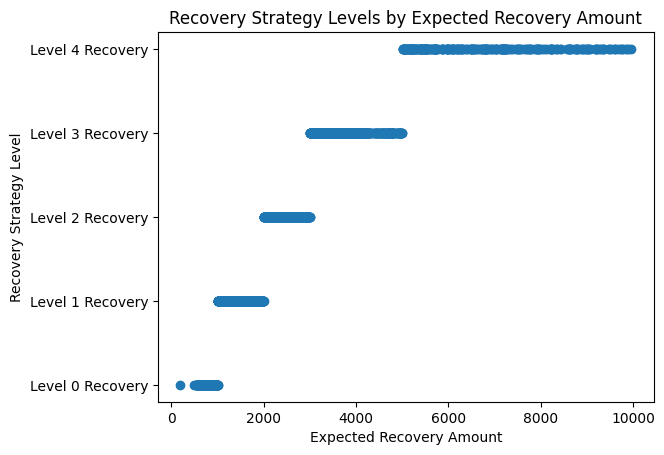

In [15]:
import matplotlib.pyplot as plt


plt.scatter(df['expected_recovery_amount'], df['recovery_strategy'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Recovery Strategy Level')
plt.title('Recovery Strategy Levels by Expected Recovery Amount')
plt.show()


In [16]:
import statsmodels.api as sm


df['above_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)


X = sm.add_constant(df['expected_recovery_amount'])
model = sm.OLS(df['actual_recovery_amount'], X).fit()


print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                            15:50:26   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

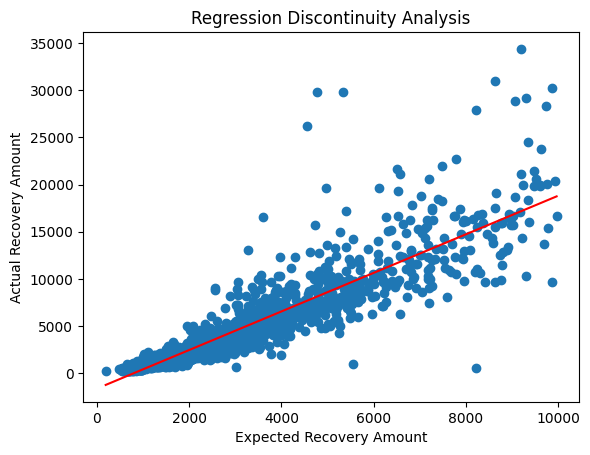

In [17]:
# Scatter plot with regression line
plt.scatter(df['expected_recovery_amount'], df['actual_recovery_amount'])
plt.plot(df['expected_recovery_amount'], model.predict(), color='red')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Regression Discontinuity Analysis')
plt.show()


Graphical Exploratory Data Analysis

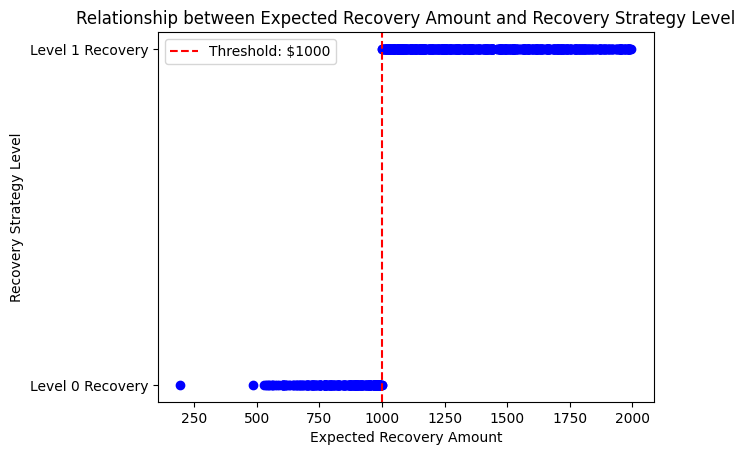

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



filtered_data = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]


plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['recovery_strategy'], color='blue')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Recovery Strategy Level')
plt.title('Relationship between Expected Recovery Amount and Recovery Strategy Level')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold: $1000')
plt.legend()
plt.show()


Statistical Test: Age vs. Expected Recovery Amount

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind



threshold = 1000


above_threshold = df[df['expected_recovery_amount'] > threshold]
below_threshold = df[df['expected_recovery_amount'] <= threshold]


t_statistic, p_value = ttest_ind(above_threshold['age'], below_threshold['age'])


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average age.")


T-Statistic: 13.759810322222169
P-Value: 4.07177857839181e-41
Reject the null hypothesis: There is a significant difference in average age.


Statistical Test: Sex vs. Expected Recovery Amount

In [30]:
data = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) &
    (df['expected_recovery_amount']>=900)]['recovery_strategy'],df['sex'])

print(crosstab)



sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


Exploratory Graphical Analysis: Recovery Amount

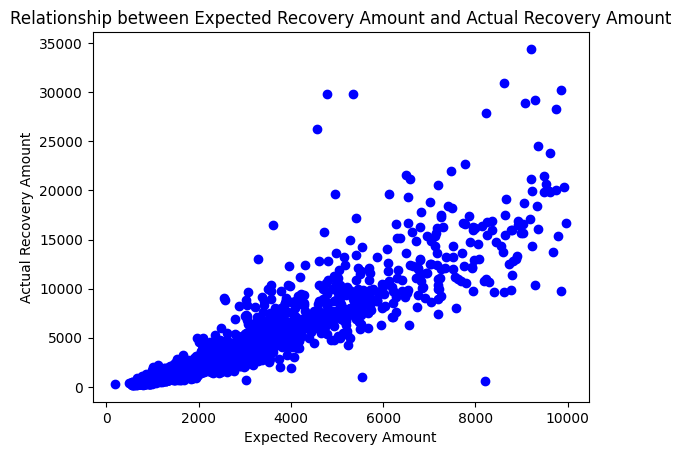

In [6]:
import matplotlib.pyplot as plt


plt.scatter(df['expected_recovery_amount'], df['actual_recovery_amount'], color='blue')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Relationship between Expected Recovery Amount and Actual Recovery Amount')
plt.show()

Statistical Analysis: Recovery Amount

In [8]:
from scipy.stats import kruskal


levels = df['recovery_strategy'].unique()


test_results = []
for level in levels:
    subset = df[df['recovery_strategy'] == level]
    test_results.append(subset['actual_recovery_amount'])


h_statistic, p_value = kruskal(*test_results)

print("Kruskal-Wallis H-Statistic:", h_statistic)
print("P-Value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in recovery amounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in recovery amounts.")


Kruskal-Wallis H-Statistic: 1659.3338437647844
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in recovery amounts.


In [10]:

windows = [(900, 1100), (950, 1050)]

for window in windows:
    subset = df[(df['expected_recovery_amount'] >= window[0]) & (df['expected_recovery_amount'] <= window[1])]
    test_results = []
    for level in levels:
        subset_level = subset[subset['recovery_strategy'] == level]
        test_results.append(subset_level['actual_recovery_amount'])

    h_statistic, p_value = kruskal(*test_results)
    print(f"Window {window}:")
    print("Kruskal-Wallis H-Statistic:", h_statistic)
    print("P-Value:", p_value)

    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in recovery amounts.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in recovery amounts.")
    print()


Window (900, 1100):
Kruskal-Wallis H-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in recovery amounts.

Window (950, 1050):
Kruskal-Wallis H-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in recovery amounts.



Regression Modeling: No Threshold

In [12]:
import statsmodels.api as sm


X = df['expected_recovery_amount']
y = df['actual_recovery_amount']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            02:34:46   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Regression Modeling: Adjusting the Window

In [24]:
import statsmodels.api as sm


windows = [(900, 1100), (950, 1050)]

for window in windows:
    subset = df[(df['expected_recovery_amount'] >= window[0]) & (df['expected_recovery_amount'] <= window[1])]


    X = subset[['expected_recovery_amount']]
    y = subset['actual_recovery_amount']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Window {window}:")
    print(model.summary())
    print()




Window (900, 1100):
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):           3.65e-13
Time:                            03:00:20   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

Validation and Further Analysi

In [23]:
import statsmodels.api as sm


windows = [(900, 1100), (950, 1050), (1000, 1200), (1050, 1250)]

for window in windows:
    subset = df[(df['expected_recovery_amount'] >= window[0]) & (df['expected_recovery_amount'] <= window[1])]


    X = subset[['expected_recovery_amount']]
    y = subset['actual_recovery_amount']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Window {window}:")
    print(model.summary())
    print()


Window (900, 1100):
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):           3.65e-13
Time:                            02:59:20   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------